# Part I - (Used Car Dataset)
## by (Joseph Njuguna)

## Introduction
This dataset containing records of Used Cars that are up for sale . The dataset was downloaded from https://www.kaggle.com/datasets/shubham1kumar/usedcar-data/



In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker
matplotlib.rcParams['ytick.minor.size'] = 0
matplotlib.rcParams['ytick.minor.width'] = 0
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.0f' % x)


### Data Gathering

In [2]:
Data=pd.read_csv('UserCarData.csv')
Data.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23,1248,74,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21,1498,104,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,18,1497,78,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23,1396,90,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16,1298,88,"11.5@ 4,500(kgm@ rpm)",5,Y


### Data Wrangling

#### Assessing Data

##### Quality Issues
1. Mileage column has records with 0 mileage
2. km_driven column values above 1000000
3. Datatype  on the columns
4. Selling Price currency unit


##### Tideness Issues
1. Region,state or Province,City,torque and Sold Columns should be dropped

#### Data Cleaning

In [3]:
#make copies of the Data
CarData=Data.copy()

##### Mileage Column has records with 0 mileage

###### Define:

Drop all records with 0 Mileage


###### Code:

In [4]:
UserCarData=CarData.loc[CarData['mileage']!=0]

###### Test:

In [5]:
UserCarData.loc[UserCarData['mileage']==0].shape

(0, 18)

#### Selling Price currency unit

###### Define:

Change currency unit from Indian Rupees to US Dollars on Selling Price Column

###### Code:

In [6]:
UserCarData['selling_price']=UserCarData['selling_price'].apply(lambda x: x*0.013)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


###### Test:

In [7]:
UserCarData['selling_price'].head()

0   5850
1   4810
2   2054
3   2925
4   1690
Name: selling_price, dtype: float64

#### km_driven column has records above 1000000km

###### Define:

We note that only two cars have km_driven above 600000.The two cars have been driven for 1500000 and 2360457 . The selling price of the cars does not seem inline with the selling price, and this seems like a data entry error.We will drop these two records

###### Code:

In [8]:
UserCarData.shape

(7889, 18)

In [9]:
UserCarData.loc[UserCarData['km_driven']>600000]

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
1757,1811,Mahindra,2012,6500,1500000,Central,Illinois,West Chicago,Diesel,Individual,Manual,First_Owner,15,2179,140,330Nm@ 1600-2800rpm,7,Y
3377,3487,Hyundai,2007,7150,2360457,South,Mississippi,Clinton,Petrol,Individual,Manual,Second_Owner,19,1197,82,114.7Nm@ 4000rpm,5,N


In [10]:
UserCarData=UserCarData.loc[UserCarData['km_driven']<600000]

##### Test:

In [11]:
UserCarData.loc[UserCarData['km_driven']>600000].shape

(0, 18)

#### Datatype  on the columns

###### Define:

Change datatype of the Sales-id column to Object and fuel,seller_type,transmission,owner,seats to Categorical

###### Code:

In [12]:
UserCarData['Sales_ID']=UserCarData['Sales_ID'].astype('object')
category=['fuel','seller_type','transmission','owner','seats']

for cat in range(len(category)):
    x=category[cat]
    UserCarData[x]=UserCarData[x].astype('category')


###### Test:

In [13]:
UserCarData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7887 entries, 0 to 7905
Data columns (total 18 columns):
Sales_ID             7887 non-null object
name                 7887 non-null object
year                 7887 non-null int64
selling_price        7887 non-null float64
km_driven            7887 non-null int64
Region               7887 non-null object
State or Province    7887 non-null object
City                 7887 non-null object
fuel                 7887 non-null category
seller_type          7887 non-null category
transmission         7887 non-null category
owner                7887 non-null category
mileage              7887 non-null float64
engine               7887 non-null int64
max_power            7887 non-null float64
torque               7887 non-null object
seats                7887 non-null category
sold                 7887 non-null object
dtypes: category(5), float64(3), int64(3), object(7)
memory usage: 902.1+ KB


#### Region,state or Province,City,torque and Sold Columns

###### Define:


Drop Region,State or Province, city, torque and Sold Columns

###### Code:

In [14]:
UserCarData=UserCarData.drop(['Region','State or Province','City','torque','sold'],axis=1)

###### Test:

In [15]:
UserCarData.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'seats'],
      dtype='object')

#### Check for Null Values

In [16]:
UserCarData.isnull().sum()

Sales_ID         0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

#### Check for Duplicated Values

In [17]:
UserCarData.duplicated().sum()

0

### What is the structure of your dataset?

The dataset contains the features name,year,selling price,km_driven,fuel,seller_type
transmission and owner details of used cars

### What is/are the main feature(s) of interest in your dataset?

The main feature in our dataset is the selling price and how its impacted by the other features of the used car. However, we are also interested in finding out the relationship between the other features.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

We shall use the features:name,year,selling price,km_driven,fuel,seller_type transmission and owner

### Univariate Exploration

We will start by checking on the distribution of the name column


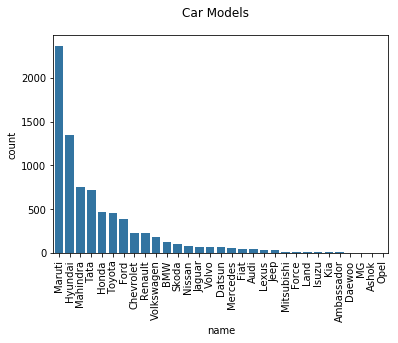

In [18]:
base_color = sns.color_palette()[0]
sns.countplot(data=UserCarData,x='name',order=UserCarData['name'].value_counts().index,color=base_color)
plt.suptitle('Car Models')
plt.xticks(rotation=90)
plt.show()

We note that the Model with the highest count among the used cars is Maruti followed by Hyundai.We note a steep decline between the number of Maruti,Hyundai and Mahindra models. Thereafter we note a steady decline among the other models count

Next, we will explore the year column inorder to group the models by year of Production

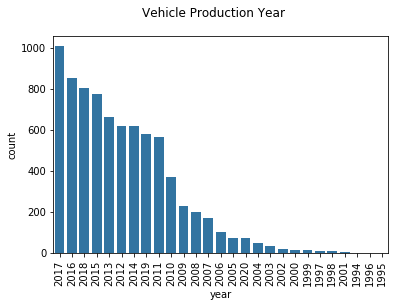

In [19]:
base_color = sns.color_palette()[0]
sns.countplot(data=UserCarData,x='year',order=UserCarData['year'].value_counts().index,color=base_color)
plt.suptitle('Vehicle Production Year ')
plt.xticks(rotation=90)
plt.show()

We note that most of the cars were produced in the year 2017.We note that 2020 had the lowest cars produced compared to the other years after 2010.
Next, we will explore the Fuel,seller_type,transmission,seats and owners Column

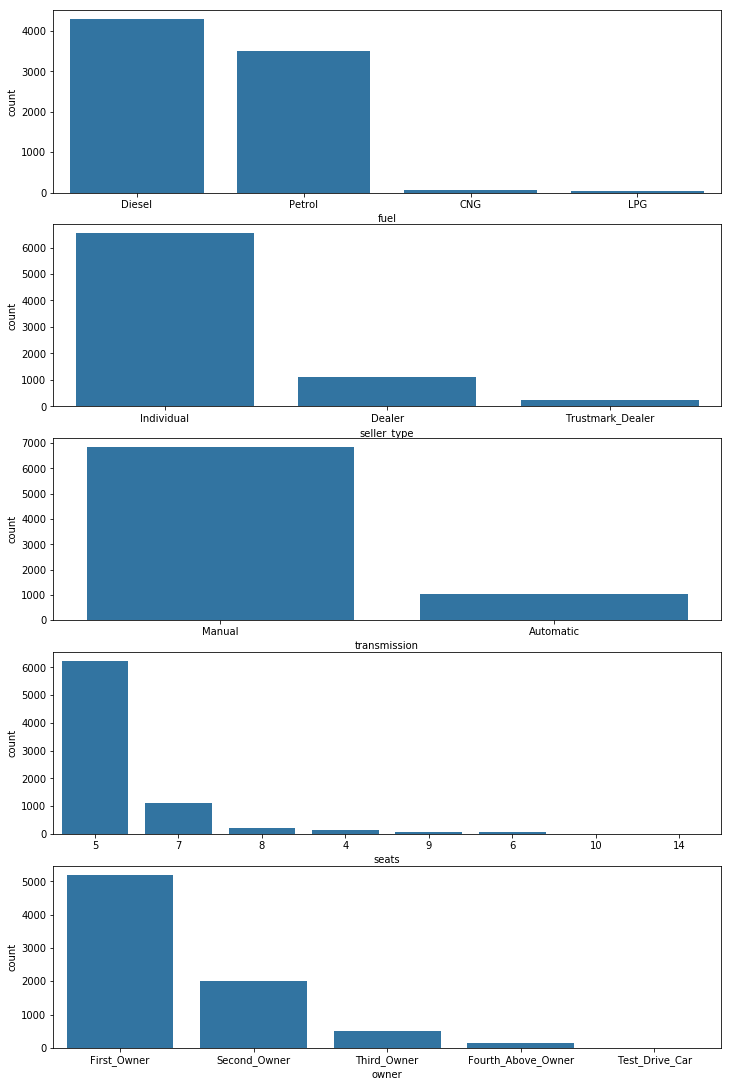

In [20]:
fig, ax = plt.subplots(nrows=5, figsize = [10,15])
fig.tight_layout()
features=['fuel','seller_type','transmission','seats','owner']
for item in range(len(features)):
    x=features[item]
    sns.countplot(data=UserCarData,x=x,order=UserCarData[x].value_counts().index,color=base_color,ax=ax[item])
    
plt.show()

From the plots, we have noted that most of the cars are run on diesel followed by Petro,CNG and LPG.
It is also evident from the plots, that a much higher percentage of the cars are sold by  individuals sellers compared to dealers.
Around 6500 of the used cars use manual transmission while approximately 1000 used cars use automatic transmission.
A much bigger percentage of the used cars are 5 seaters and owned by first owners.


Next, we will explore the distribution of the Mileage,Max_power and Engine_size Features

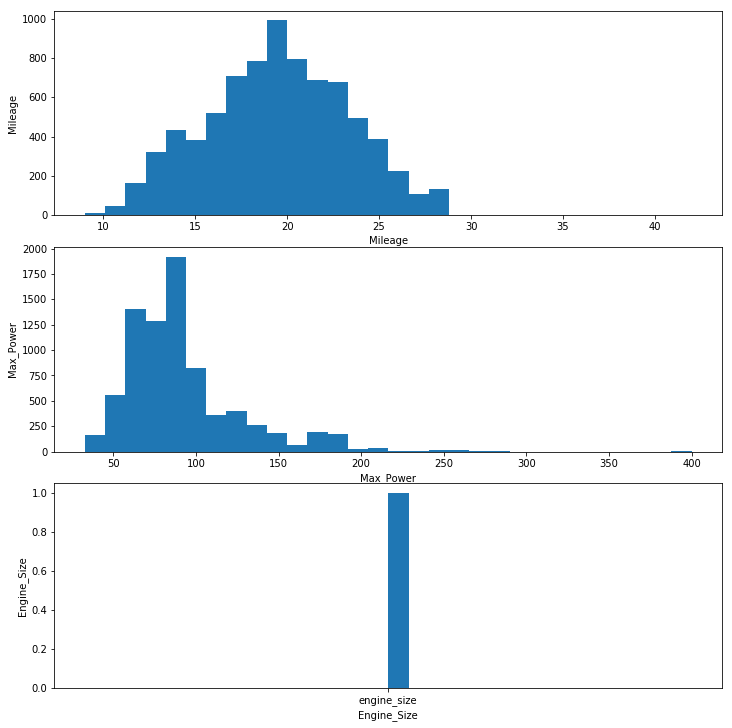

In [21]:
fig, ax = plt.subplots(nrows=3, figsize = [10,10])
fig.tight_layout()
features=['mileage','max_power','engine_size']
for item in range(len(features)):
    x=features[item]
    bins=30
    ax[item].hist(data=UserCarData,x=x,bins = bins)
    ax[item].set_xlabel('{}'.format(x).title())
    ax[item].set_ylabel('{}'.format(x).title())
plt.show()

We note that the mileage is unimodal and has a normal distribution.Max_power distribution is noted to be a little skewed to the right but there are no outliers in the data . Engine size has a long-tailed distribution.We will adjust the x-ticks of the engine size plot in the next cell inorder to further check on the distribution of the values.

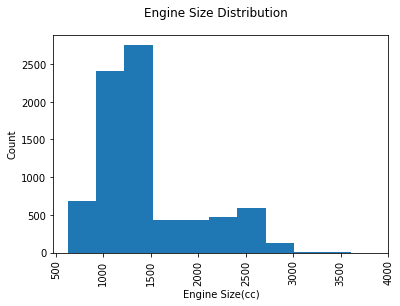

In [22]:
binsize = 50
fig,ax=plt.subplots()
bins = np.arange(0,UserCarData['engine'].max()+binsize, binsize)
ax.hist(data=UserCarData,x='engine')
ax.set_xticks([500,1000,1500,2000,2500,3000,3500,4000])
plt.suptitle('Engine Size Distribution')
plt.xticks(rotation=90)
plt.xlabel('Engine Size(cc)')
plt.ylabel('Count')
plt.show()

We note that the engine size distribution is skewed to the right, however there are no outliers in the data


Next, we will explore the distribution of the km_driven feature

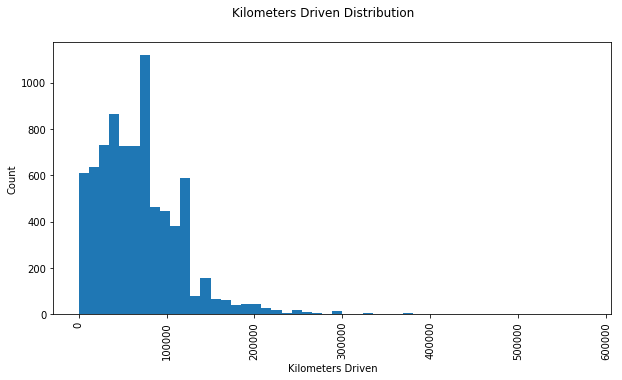

In [23]:
binsize = 50
fig,ax=plt.subplots(figsize=(10,5))
ax.hist(data=UserCarData,x='km_driven',bins=binsize)
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.suptitle('Kilometers Driven Distribution')
plt.xlabel('Kilometers Driven')
plt.ylabel('Count')
plt.show()

From km_driven distribution, we note that the distribution is skewed to the right, with much higher values upto 600000km, hence the skeweness.We note that most of the cars have not covered more than 200000km

Next, we will check on the distribution of the selling price

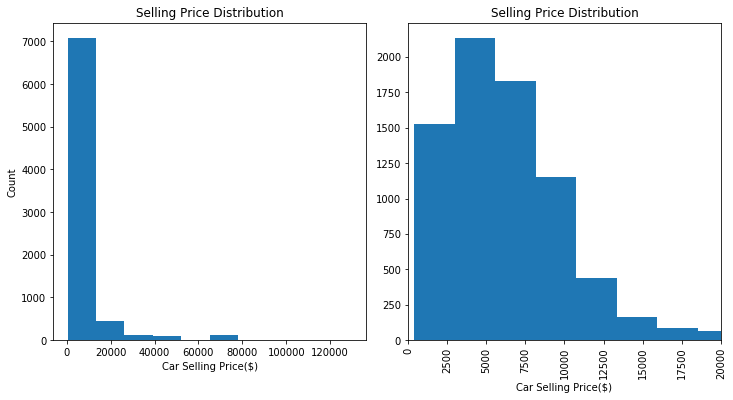

In [24]:
binsize =100
fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.tight_layout()
ax[0].hist(data=UserCarData,x='selling_price')
ax[0].set_title('Selling Price Distribution')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Car Selling Price($)')
ax[1].hist(data=UserCarData,x='selling_price',bins=50)
ax[1].set_title('Selling Price Distribution')
ax[1].set_xlim((0,20000))
ax[1].set_xlabel('Car Selling Price($)')
plt.xticks(rotation=90)
plt.show()


We have noted that the selling price is skewed to the right, due to the high values of upto 120000.Second plot x axis has been limited to 20000  so that we can be able to see the selling price distribution.The distribution is unimodal with most of the used cars, costing less than 10000$.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The selling price of the used cars is skewed to the right due to high selling price of some of the cars . However, once we limit the scale to 20000$ , we note that the distribution is unimodal with most cars having a price tag of less than 10000 dollars.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

From the investigations, no unusual distributions were noted, as such no changes were carried out on the data.All the features were noted to each have a unimodal distribution with no outliers noted

## Bivariate Exploration



We will start by exploring the relationship between Selling Price and Kilometers Driven

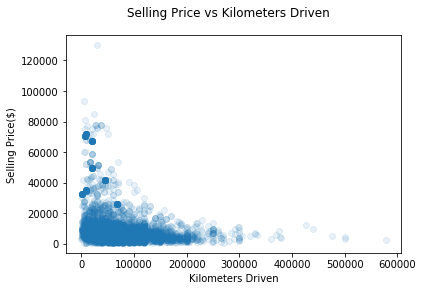

In [25]:
fig,ax=plt.subplots()
ax.scatter(data=UserCarData,x='km_driven',y='selling_price',alpha=0.1)
plt.suptitle('Selling Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price($)')
plt.show()

We note that Selling Price and Kilometers Driven are negatively correlated.

Next, we will check on the relationship between Selling Price and Mileage

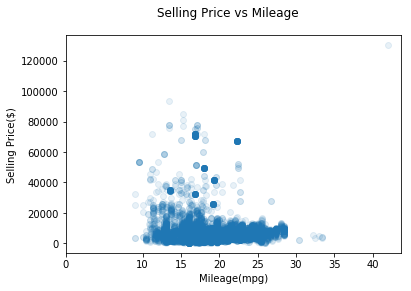

In [26]:
fig,ax=plt.subplots()
sns.regplot(data=UserCarData,x='mileage',y='selling_price',ax=ax,scatter_kws={'alpha':0.1},fit_reg=False)
ax.set_xticks([0,10,15,20,25,30,35,40])
plt.suptitle('Selling Price vs Mileage')
plt.xlabel('Mileage(mpg)')
plt.ylabel('Selling Price($)')
plt.show()


We do not see a clear correlation between Selling and a cars Mileage from our plot. However, we note that beyond 30mpg we can see the selling price of the vehicle decreases.We will investigate this further,as we would expect a vehicle with such a high mileage to be expensive

Next, we will investigate the relationship between Selling Price and Engine Size

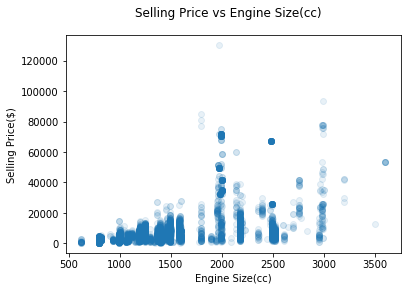

In [27]:
fig,ax=plt.subplots()
sns.regplot(data=UserCarData,x='engine',y='selling_price',ax=ax,scatter_kws={'alpha':0.1},fit_reg=False)
plt.suptitle('Selling Price vs Engine Size(cc)')
plt.xlabel('Engine Size(cc)')
plt.ylabel('Selling Price($)')
plt.show()


From our plot, we note that the Selling Price and Engine Size(cc) are  positively correlated. We however note that vehicles above 3000cc have very low prices compared to vehicles lower 3000cc. This is opposite the stated correlation and we will investigate this further.

Next, we will investigate the relationship between Max power and Engine Size

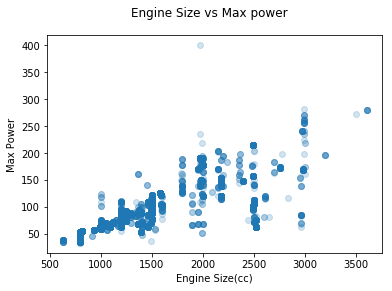

In [28]:
fig,ax=plt.subplots()
sns.regplot(data=UserCarData,x='engine',y='max_power',ax=ax,fit_reg=False,scatter_kws={'alpha':0.2})
plt.suptitle('Engine Size vs Max power')
plt.xlabel('Engine Size(cc)')
plt.ylabel('Max Power')
plt.show()


From the plot, we note that max_power and engine size are positively correlated.

Up next, is the relationship between Selling Price and Maximum Power

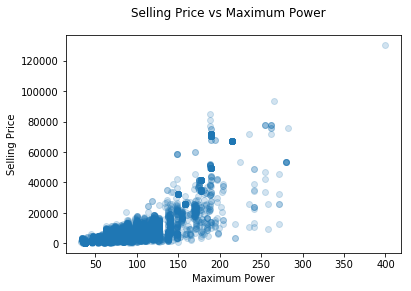

In [29]:
fig,ax=plt.subplots()
sns.regplot(data=UserCarData,x='max_power',y='selling_price',ax=ax,fit_reg=False,scatter_kws={'alpha':0.2})
plt.suptitle('Selling Price vs Maximum Power')
plt.xlabel('Maximum Power')
plt.ylabel('Selling Price')
plt.show()


From the plot, we note that Selling Price and Maximum Power are positively Correlated.we however note that there 
are some vehicles with very high power(above 200) , yet very low selling prices. We shall get to the bottom of this in the next section

Next, we will check on the relationship between Mileage and Engine Size

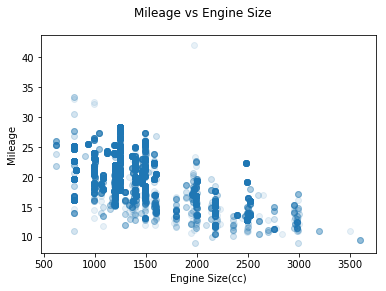

In [30]:
sns.regplot(data=UserCarData,x='engine',y='mileage',scatter_kws={'alpha':0.1},fit_reg=False)
plt.suptitle('Mileage vs Engine Size')
plt.xlabel('Engine Size(cc)')
plt.ylabel('Mileage')
plt.show()

From the plot, we note that Mileage and Engine Size are negatively Correlated.This is the expected behaviour where as the engine size increases, the Mileage reduces as the car consumes more fuel

Next, we will check on the relationship between  Mileage and  Fuel

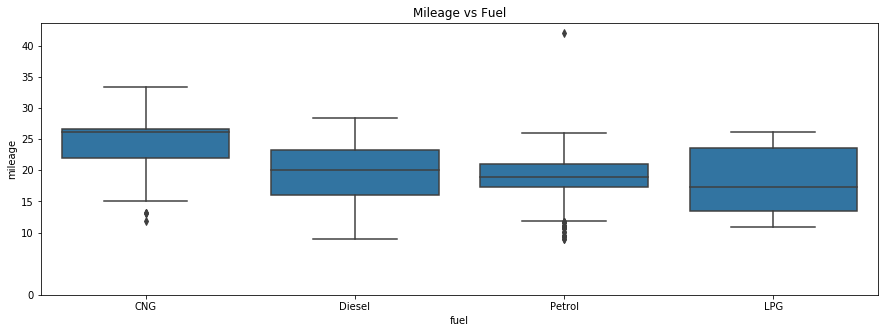

In [31]:
base_color=sns.color_palette()[0]
fig,ax=plt.subplots(figsize=(15,5))
sns.boxplot(data=UserCarData,x='fuel',y='mileage',ax=ax,color=base_color,order=['CNG','Diesel','Petrol','LPG'])
ax.set_yticks([0,10,15,20,25,30,35,40])
ax.set_title('Mileage vs Fuel')
plt.show()

We  note that vehicles with a higher/better Mileage use Diesel compared to Petrol.
Diesel cars  have better mileage than their petrol conterparts. Further, in our analysis, we would like to see how mileage compares between manual and automatic vehicles.

In [32]:
#Define a function to plot box plots
def boxplotter(x,y):
    base_color = sns.color_palette()[0]
    fig,ax=plt.subplots()
    plt.yscale('log')
    sns.boxplot(data=UserCarData,x=x,y=y,color=base_color)
    ax.set_yticks([1000,2500,5000,10000,20000,35000,70000,130000])
    ax.set_yticklabels(['1,000','2,500','5,000','10,000','20,000','35,000','70,000','130,000'])
    ax.set_title('{} vs {}'.format(y.replace('_',' ').title(),x.title()))

Lets review the relationship between Fuel and Selling Price

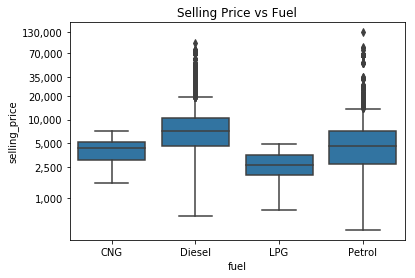

In [33]:
boxplotter('fuel','selling_price')
plt.show()

We note that cars using Diesel are more expensive  on average compared to those using Petrol

Relationship between Transmission and Selling Price

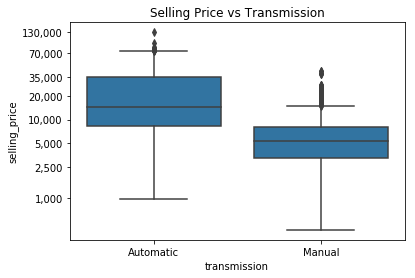

In [34]:
boxplotter('transmission','selling_price')
plt.show()

From the Plot, we are able to establish that Automatic vehicles are more expensive than manual cars.



Next, lets review the relationship between Selling Price and ownership

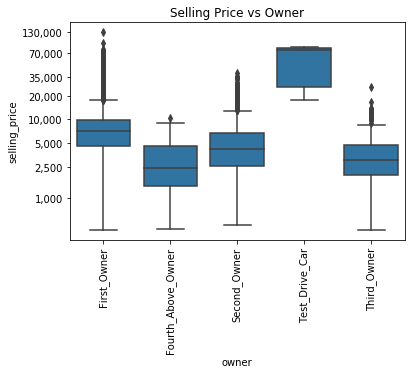

In [35]:
boxplotter('owner','selling_price')
plt.xticks(rotation=90)
plt.show()


We note that Selling Price and Ownership status are negatively Correlated.As a car is passed along from first to second and third owners, we note the price continues to decrease. A different case is noted with Test Drive Cars, where we note that the price of Test Drive cars is relatively high. We will investigate this further on the next section

Next, lets review the relationship between Selling Price and Seller type

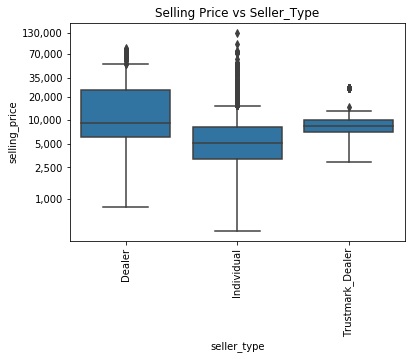

In [36]:
boxplotter('seller_type','selling_price')
plt.xticks(rotation=90)
plt.show()

We note that cars sold by individuals are relatively cheaper compared to cars sold by Dealers.

Selling Price vs Seats

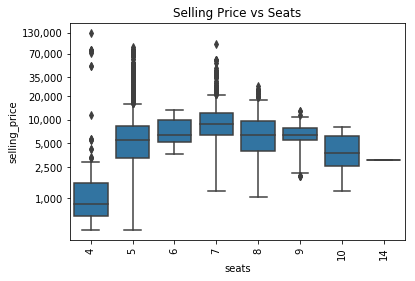

In [37]:
boxplotter('seats','selling_price')
plt.xticks(rotation=90)
plt.show()


From the plot, we note that the selling price increases gradually for cars with seats greater than or equal to 4  and less than 8 seats .
For cars with greater than or equal to 8 seats, the selling price decreases.We will need to investigate this further.

We will further review the relationship between Transmission and Mileage

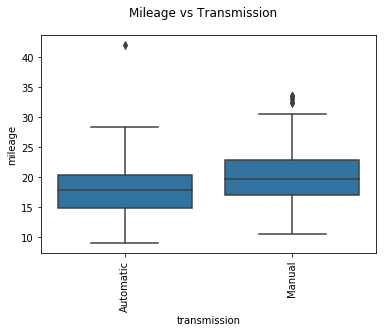

In [38]:
base_color=sns.color_palette()[0]
sns.boxplot(data=UserCarData,x='transmission',y='mileage',color=base_color)
plt.xticks(rotation=90)
plt.suptitle('Mileage vs Transmission')
plt.show()

From the plot, we note that manual vehicles have better mileage compared to automatic cars.

Next below, we shall review the correlation matrix of the Numeric features in the dataset.

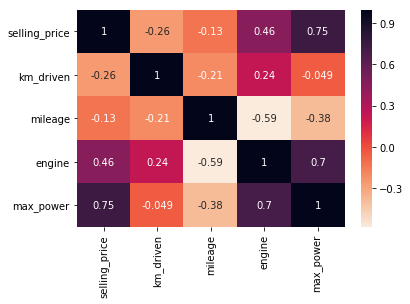

In [39]:
numeric_vars=['selling_price','km_driven','mileage','engine','max_power']
sns.heatmap(UserCarData[numeric_vars].corr(),annot=True,cmap='rocket_r')
plt.show()

We note a high positive correlation between Selling Price and max_power and a low negative correlation between km_driven and mileage

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. From the investigation, we noted that the Selling price is positively correlated to the car engine size and max_power. We noted a negative correlation between selling price and km_driven.
2. We further noted that the Cars sold by individuals are much cheaper compared to cars sold by dealers.
3. Selling price increases gradually for cars with seats greater than or equal to 4 and less than 8 seats . For cars with greater than or equal to 8 seats, the selling price decreases gradually

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We further noted interesting relationships between other features as per below:
1. Manual cars have better mileage compared to automatic cars
2. Diesel cars have better mileage compared to Petrol cars.CNG cars have the best mileage.
3. We noted a negative correlation between engine size and mileage.
` 


## Multivariate Exploration



Under this section, we will start by investigating further some of the interesting relationships that were noted under univariate and Bivariate relationships

#### During investigation of the features Selling Price vs Owner, we noted that Test Drive cars had a higher selling price compared to other cars in the ownership category

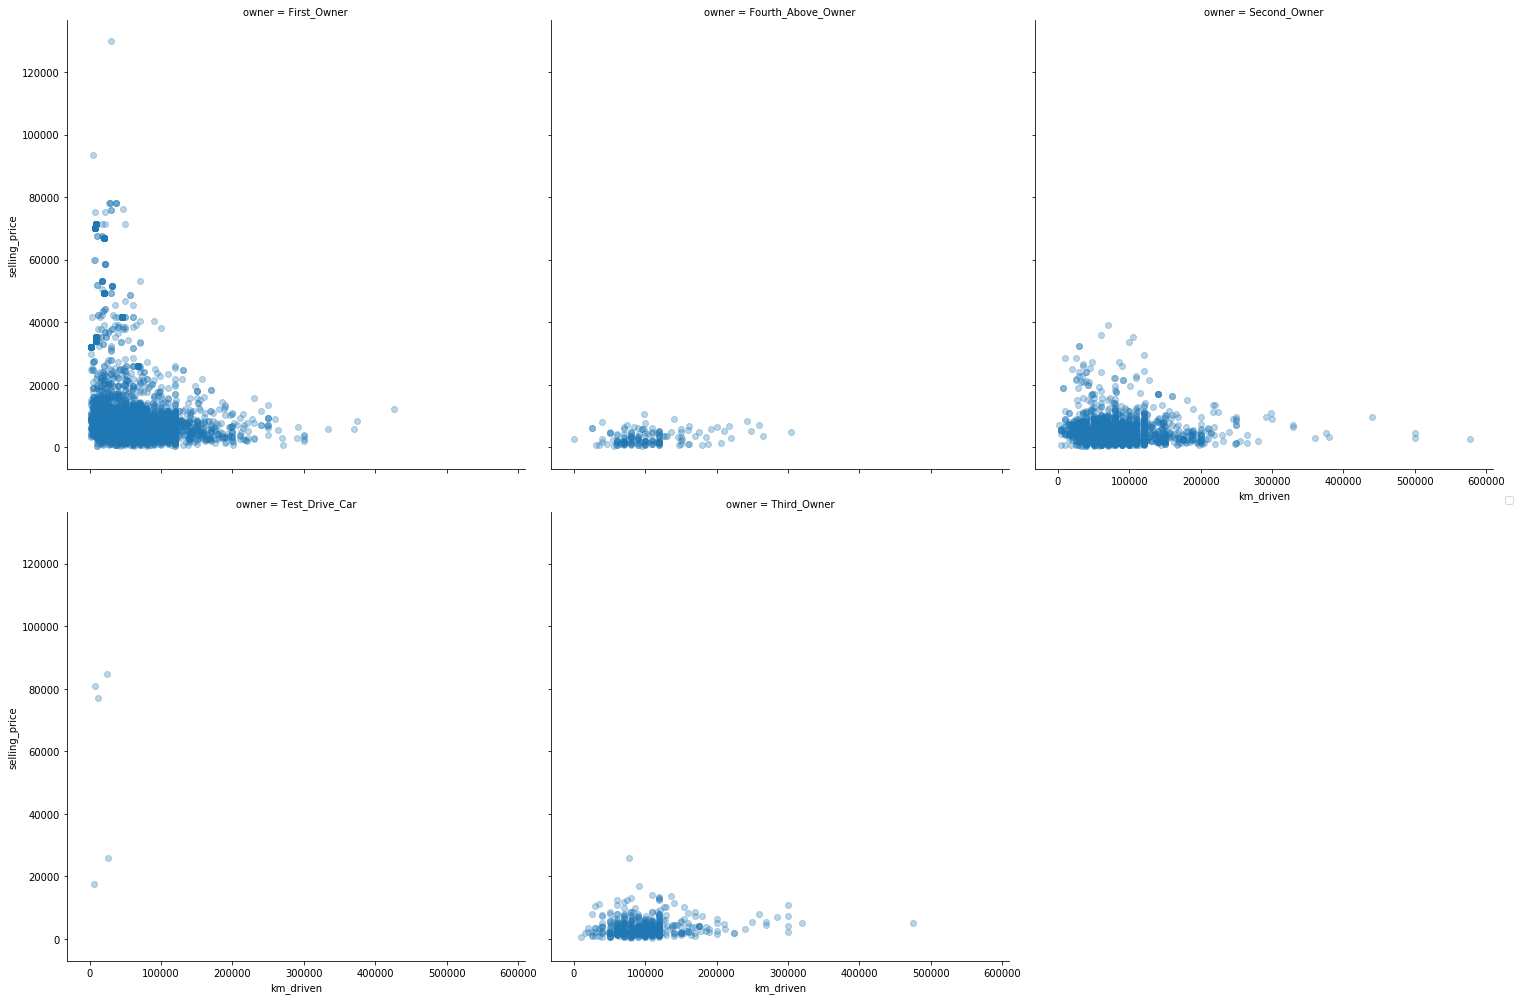

In [40]:
g = sns.FacetGrid(data = UserCarData, col = 'owner',size=7,col_wrap=3)
g.map(plt.scatter, 'km_driven', 'selling_price',alpha=0.3)
g.add_legend()
plt.show()

From the plot of Selling Price vs Km_driven, we have noted that Test_Drive cars have been driven for very low Kilometers . 
From the Bivariate section, we noted that the Selling Price is negatively correlated with km_driven. This explains the high selling price for Test Drive cars.

#### From the Plot selling price vs Mileage, we noted that cars with mileage greater than 30mpg had very low selling prices

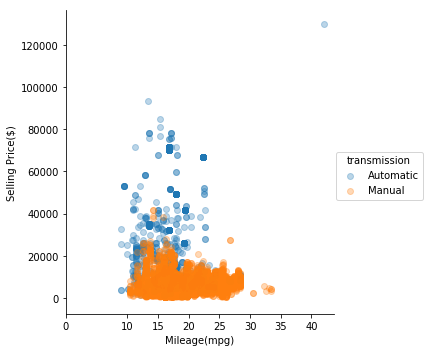

In [41]:
xticks=[0,10,15,20,25,30,35,40]
g = sns.FacetGrid(data = UserCarData, hue = 'transmission',size=5)
g.map(plt.scatter, 'mileage', 'selling_price',alpha=0.3)
g.set(xticks=xticks)
plt.xlabel('Mileage(mpg)')
plt.ylabel('Selling Price($)')
g.add_legend()
plt.show()

From the above plot, we have noted that cars with mileage greater than 30mpg are by a very high portion manual cars. From the Bivariate section,
we noted that manual cars are cheaper compared to automatic cars. This explains the gradual decline in selling price above 25mpg

#### From the Plot Selling Price vs Engine Size, we noted vehicles with Capacity above 3000cc had very low Selling Prices

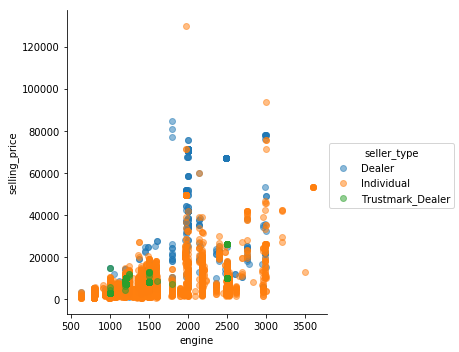

In [42]:
g = sns.FacetGrid(data = UserCarData, hue = 'seller_type',size=5)
g.map(plt.scatter, 'engine', 'selling_price',alpha=0.5)
g.add_legend()
plt.show()

From the above plot, we note that vehicles above 3000cc are owned by individuals. From the Bivariate section,we noted that vehicles sold by Individuals have the lowest selling prices. 

#### From the Plot Selling Price vs Max_power we noted that some vehicles with power above 200 have very low selling prices.
This is contrary to our expectation where we expect all vehicles with high power to have high Selling Prices.

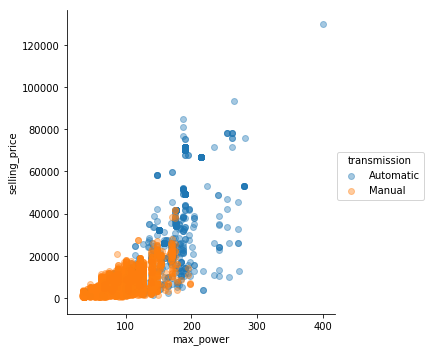

In [43]:
g = sns.FacetGrid(data = UserCarData, hue = 'transmission',size=5)
g.map(plt.scatter, 'max_power', 'selling_price',alpha=0.4)
g.add_legend()
plt.show()

We start our investigation by checking on the transmission of cars with power above 200. We note all these cars are automatic cars.From our earlier analysis automatic cars have much high selling prices.We have to look at another feature inorder to get more insight.
We will examine the seller_type feature of these cars below:

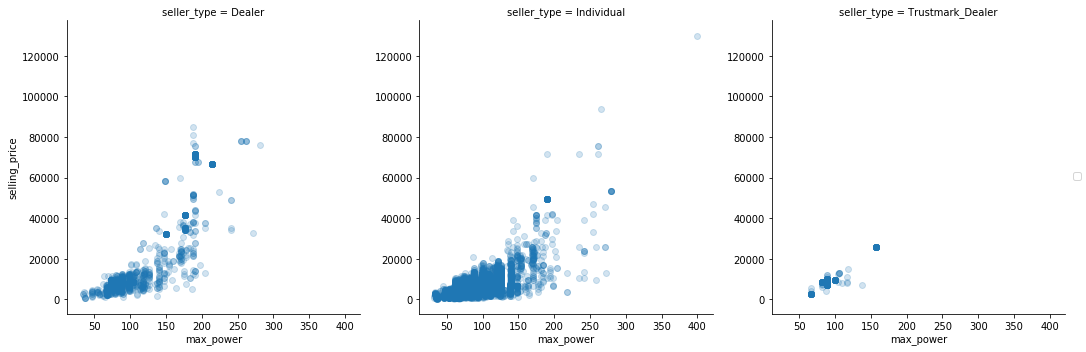

In [44]:
g = sns.FacetGrid(data = UserCarData, col= 'seller_type',size=5)
g.map(plt.scatter, 'max_power', 'selling_price',alpha=0.2)
g.add_legend()
plt.show()

We are able to note that cars with max_power greater than 200 and much lower Selling Prices are sold by individuals hence the low Selling price.

#### From the Plot Mileage vs Fuel on the Bivariate Section, we noted that Diesel cars have better mileage than Petrol cars
We would like to determine if this is the case for both Manual and automatic cars under each category

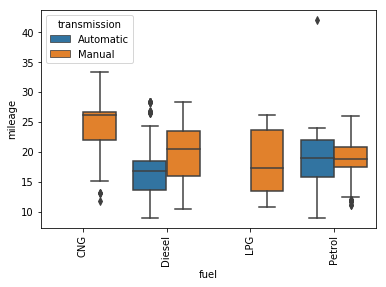

In [45]:
sns.boxplot(data=UserCarData,x='fuel',y='mileage',hue='transmission')
plt.xticks(rotation=90)
plt.show()


From the above plot, we have noted Diesel automatic cars have much lower mileage compared to cars running on Petrol. We will investigate further on the next cell to determine the reason

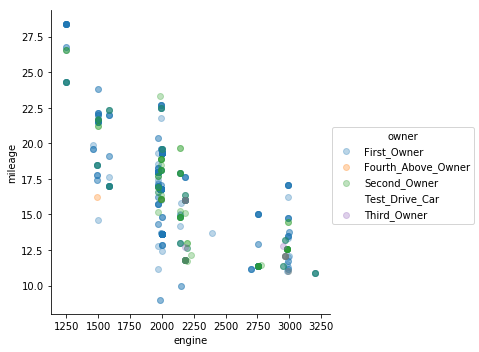

In [46]:
#Filter Data for cars that use Diesel Fuel and automatic Transmission.
g = sns.FacetGrid(data = UserCarData.loc[(UserCarData['fuel']=='Diesel')&(UserCarData['transmission']=='Automatic')],size=5,hue='owner')
g.map(plt.scatter, 'engine', 'mileage',alpha=0.3)
g.add_legend()


From the above Plot(x-axis ticks), we note that for automatic cars using diesel,most of them have engines above 2000cc(big engine).We noted that the relationship bet
ween engine size and mileage is negatively correlated.This explains why diesel automatic cars have low mileage.

#### From our bivariate investigation, we noted that Automatic cars are more expensive than manual cars.
We will take a further look at this to establish why this is the case

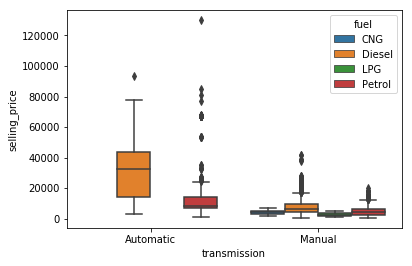

In [47]:
fig,ax=plt.subplots()
sns.boxplot(data=UserCarData,x='transmission',y='selling_price',hue='fuel',ax=ax)
plt.show()


From the Plot, we have noted that Diesel Automatic cars have a much higher mean selling price compared to othe fuels.This is causing
the high difference between manual and automatic cars selling prices.We will start by examining the power of manual vs automatic cars

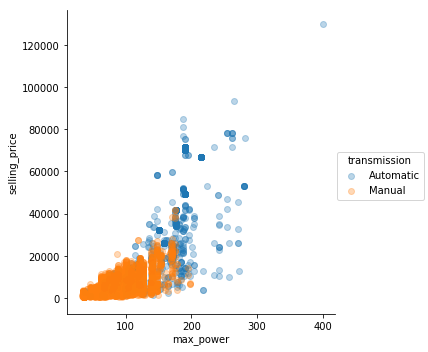

In [48]:
g = sns.FacetGrid(data = UserCarData, hue = 'transmission',size=5)
g.map(plt.scatter, 'max_power', 'selling_price',alpha=0.3)
g.add_legend()


We note that all the powerful cars with power above 200 are automatic cars.

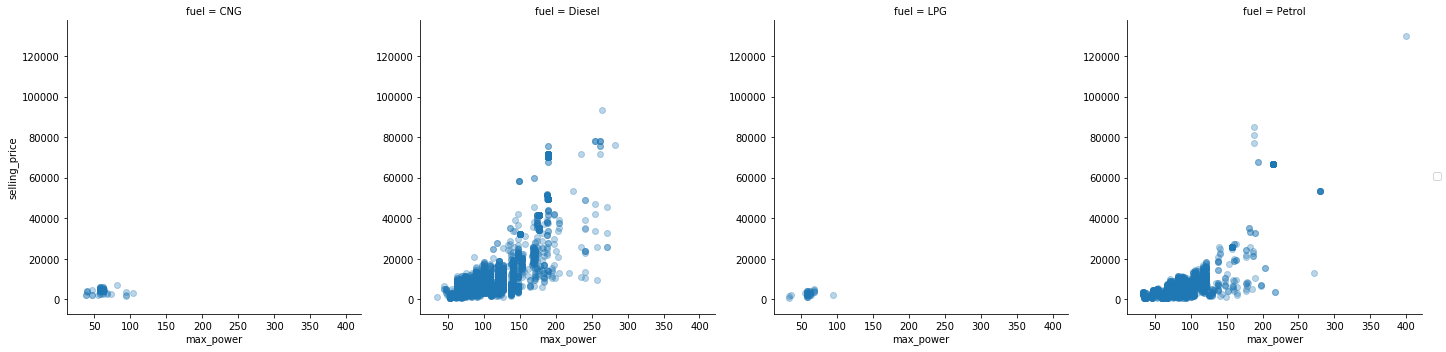

In [49]:
g = sns.FacetGrid(data = UserCarData, col = 'fuel',size=5)
g.map(plt.scatter, 'max_power', 'selling_price',alpha=0.3)
g.add_legend()

Checking further, shows that these automatic cars with power above 200, use Diesel.Since max power is positively correlated with selling price , this is the reason, the mean selling price of diesel automatic cars is much higher.

#### Selling Price Decrease for cars with more than 7 seats.
On the bivariate section, we noted that selling price increases with number of seats upto 7 seats, after 7seats, the selling price 
decreases.We start by filtering out our data of interest and checking on the properties of these cars.

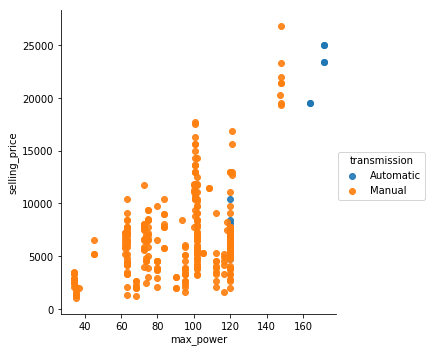

In [50]:
g = sns.FacetGrid(data = UserCarData.loc[UserCarData['seats'].isin([8,9,10,14])], hue = 'transmission',size=5)
g.map(plt.scatter, 'max_power', 'selling_price',alpha=0.9)
g.add_legend()
plt.show()

From the above plot, of the filtered data, we note that cars with more than 7 seats have very low power from the x-ticks, lower than 160 and are manual cars.

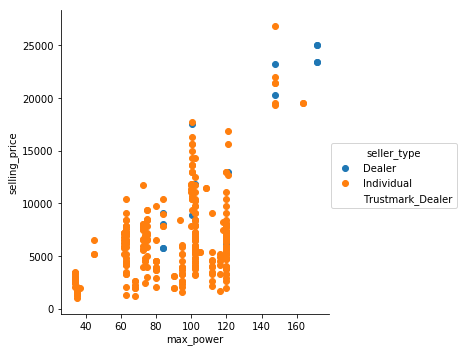

In [51]:
g = sns.FacetGrid(data =UserCarData.loc[UserCarData['seats'].isin([8,9,10,14])], hue = 'seller_type',size=5)
g.map(plt.scatter, 'max_power', 'selling_price')
g.add_legend()
plt.show()

We further note that cars, with more than 7 seats are owned by individuals.

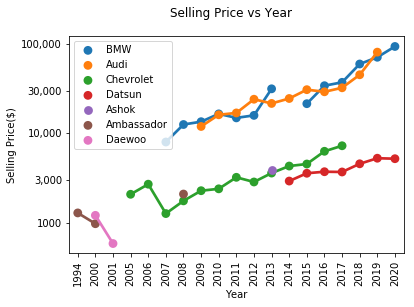

In [52]:
fig,ax=plt.subplots()
sns.pointplot(ci=None,ax=ax,x="year", y="selling_price",hue='name', data=UserCarData.groupby(['name','year'])['selling_price'].mean().head(50).reset_index().sort_values(by='selling_price',ascending=False))
plt.yscale('log')
ax.set_yticks([1000,3000,10000,30000,100000])
ax.set_yticklabels(['1000','3,000','10,000','30,000','100,000'])
plt.suptitle('Selling Price vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price($)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

We note that in top 4 models in this group,the selling price has been increasing gradually over the years,except for the last two models.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Automatic cars are more expensive than Diesel cars because automatic cars are more powerful than their Diesel counterparts.There is a positive correlation between selling price and max_power.

### Were there any interesting or surprising interactions between features?

1. The Selling price of cars with more than 7 seats gradually reduces because these cars have very low power, use manual transmission and are sold by individuals
2. Diesel Automatic cars have very low mileage

## Conclusions
1. The selling price of the used cars is skewed to the right due to high selling price of some of the cars . However,  the distribution is unimodal with most cars having a price tag of less than 1million dollars.
2. We noted that the Selling price is positively correlated to the car engine size and max_power. We noted a negative correlation between selling price and km_driven.
3. A negative correlation was also noted between selling price and ownership. As a car is handed down from one owner to the next , the price continues to decrease.
4. We further noted that the Cars sold by individuals are much cheaper compared to cars sold by dealers.
5. For cars with greater than or equal to 8 seats, the selling price decreases gradually because these cars have very low power, use manual transmission and are sold by individuals.
6. Automatic cars are more expensive than Diesel cars because automatic cars are more powerful than their Diesel counterparts.There is a positive correlation between selling price and max_power.
7. We further noted interesting relationships between other features as per below:
             Manual cars have better mileage compared to automatic cars
             Diesel cars have better mileage compared to Petrol cars.CNG cars have the best mileage.
             We noted a negative correlation between engine size and mileage.
             We noted a positive correlation between engine size and max_power of the car
